# Project Netflix 2024 as part of Cambridge Spark Data Analytics Hackathon project.

## Comparison of Netflix Content between US, UK, and Turkey by Erdi OZYURT,January 2024

This notebook outlines the steps for conducting a comparative analysis of Netflix content across the United States, the United Kingdom, and Turkey. It includes data preparation, exploration, analysis, and a concluding summary of findings and insights.Concluding summary of findings and insights and recommendations will be provided as a seperate report.

Data Source: The dataset used for analysis is sourced from KATE, dated January 2024, containing Netflix data

Approach:

1. Data Preparation:

1.1 Load the Netflix dataset and clean the dataset by handling missing values and ensuring data consistency.
1.2 Filter the dataset to include only TV shows and movies.
1.3 Subset the dataset to include data relevant to the United States, the United Kingdom, and Turkey.


2. Data Exploration:

2.1 Top Countries on Netlix Content.
2.2 Perform a cross-tabulation to analyze the distribution of content types across the three countries.
2.3 Trend of Netflix content additions over the years.
2.4 Investigate the distribution of content ratings for each country.
2.5 Examine the most common genres in each country's content.


3. Data Analysis:
3.1.Counting the number of the movies for each country
3.2 Compare the total duration of Movies & TV Shows from each country.
3.3 Determine the most popular genres for TV shows and movies in each country.
3.4 Investigate the most common directors for movies and TV shows in each country.
3.5 Investigate the ratings of the most common directors for movies and TV shows in each country
3.6 Investigate the most common casts for movies and TV shows in each country.


4. Conclusion*:

Summarize the key findings from the analysis.
Provide insights into the similarities and differences between Netflix content from the United States, the United Kingdom, and Turkey.
Discuss potential implications or recommendations based on the analysis results.

       * the 4th part will be provided provided as a seperate report.

In [1]:
# Install the libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')  

## 1. Data Preparation:

1.1 Load the Netflix dataset and clean the dataset by handling missing values and ensuring data consistency.

In [2]:
# Loading Data 
df_net = pd.read_csv("netflix_titles.csv")
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Using .head( ) function to have a quick look at the df.
df_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df_net.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,Director_info_missing,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,Director_info_missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Director_info_missing,Cast_info_missing,Country_info_missing,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,TV-PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [9]:
#Replace the NaNs regarding the above tittles:

#replace NaNs under the director with 'Director_info_missing'
df_net['director'].replace(np.nan,'Director_info_missing', inplace=True)

#replace missing country values with 'Country_info_missing'
df_net['country'].replace(np.nan, 'Country_info_missing', inplace=True)
    
#replace missing cast with 'Cast_info_missing'
df_net['cast'].replace(np.nan, 'Cast_info_missing',inplace=True) 

df_net.isnull().sum()   

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [10]:
# Drop rows with missing values in 'date_added'
df_net.dropna(subset=['date_added'], inplace=True)

# Impute missing values in 'rating' with mode
mode_rating = df_net['rating'].mode()[0]
df_net['rating'].fillna(mode_rating, inplace=True)

# Drop rows with missing values in 'duration'
df_net.dropna(subset=['duration'], inplace=True)

df_net.isnull().sum() 


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
# Convert 'date_added' column to datetime data type
df_net['date_added'] = pd.to_datetime(df_net['date_added'])

In [123]:
# Convert 'date_added' column to datetime data type (if not already done)
df_net['date_added'] = pd.to_datetime(df_net['date_added'])

# Extract month and year from 'date_added' column
df_net['added_month'] = df_net['date_added'].dt.month
df_net['added_year'] = df_net['date_added'].dt.year


In [125]:
#Check for duplicate entries
duplicate_rows = df_net[df_net.duplicated()]

# Print the number of duplicate rows, if any
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [124]:
# df_net check:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8794 non-null   object        
 1   type          8794 non-null   object        
 2   title         8794 non-null   object        
 3   director      8794 non-null   object        
 4   cast          8794 non-null   object        
 5   country       8794 non-null   object        
 6   date_added    8794 non-null   datetime64[ns]
 7   release_year  8794 non-null   int64         
 8   rating        8794 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8794 non-null   object        
 11  description   8794 non-null   object        
 12  added_month   8794 non-null   int64         
 13  added_year    8794 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 1.0+ MB


In [16]:
# Check the type of ratings
df_net['rating'].value_counts()

TV-MA       3209
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [17]:
# Tidy up the ratings

df_net['rating'] = df_net['rating'].replace({'G'      : 'TV-G', \
                                     'PG'     : 'TV-PG'
                                    })
df_net['rating'].value_counts()

TV-MA       3209
TV-14       2157
TV-PG       1148
R            799
PG-13        490
TV-Y7        333
TV-Y         306
TV-G         261
NR            79
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

1.2 .Filter the dataset to include only TV shows and movies.

In [20]:
# Finding out types
df_net['type'].value_counts()

Movie      6128
TV Show    2666
Name: type, dtype: int64

In [24]:
# Filter the dataset to include only TV shows
df_tv = df_net[df_net['type'] == 'TV Show']

# Filter the dataset to include only movies
df_mov = df_net[df_net['type'] == 'Movie']

# Display the first few rows of each new DataFrame
print("TV Shows DataFrame (df_tv):")
df_tv.head()


TV Shows DataFrame (df_tv):


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director_info_missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country_info_missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director_info_missing,Cast_info_missing,Country_info_missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director_info_missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country_info_missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [25]:
# Count the number of movies and TV shows
content_type_counts = df_net['type'].value_counts()

# Display the counts
print("Number of Movies:", content_type_counts['Movie'])
print("Number of TV Shows:", content_type_counts['TV Show'])


Number of Movies: 6128
Number of TV Shows: 2666


1.3 Subset the dataset to include data relevant to the United States, the United Kingdom, and Turkey.

In [26]:
# Subset the dataset to include data relevant to the United States, the United Kingdom, and Turkey
relevant_countries = ['United States', 'United Kingdom', 'Turkey']
df_subset = df_net[df_net['country'].isin(relevant_countries)]

# Display the first few rows of the subsetted DataFrame
print(df_subset.head())


   show_id     type                          title               director  \
0       s1    Movie           Dick Johnson Is Dead        Kirsten Johnson   
8       s9  TV Show  The Great British Baking Show        Andy Devonshire   
9      s10    Movie                   The Starling         Theodore Melfi   
15     s16  TV Show              Dear White People  Director_info_missing   
21     s22  TV Show         Resurrection: Ertugrul  Director_info_missing   

                                                 cast         country  \
0                                   Cast_info_missing   United States   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   United States   
15  Logan Browning, Brandon P. Bell, DeRon Horton,...   United States   
21  Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...          Turkey   

   date_added  release_year rating   duration  \
0  2021-09-25          2020  PG-13     90 min   


## 2. Data Exploration:

2.1 Top Countries on Netlix Content

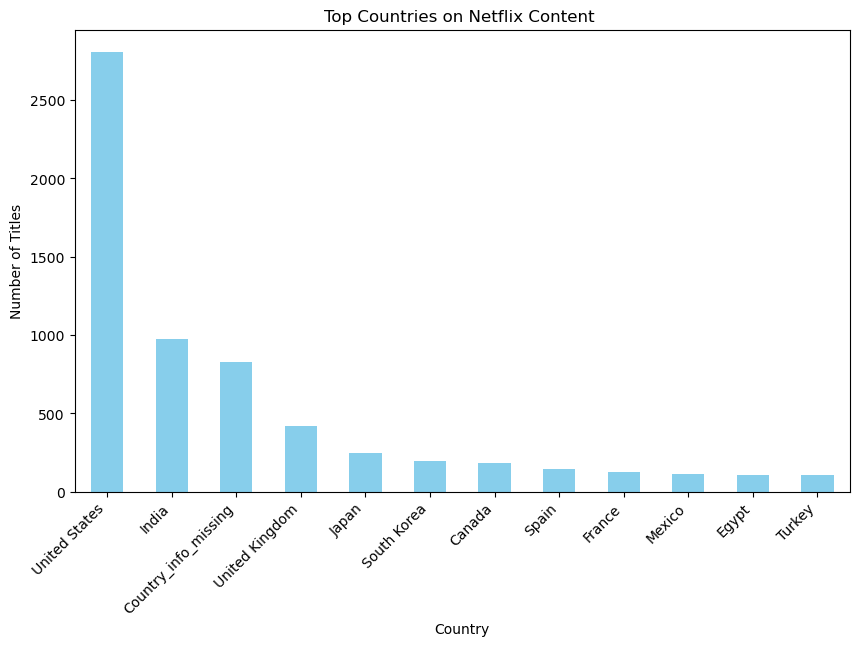

In [50]:

# Count the number of titles produced by each country
top_countries = df_net['country'].value_counts().head(12)  # Selecting the top 12 countries

# Plot the distribution of titles produced by each country
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Countries on Netflix Content ')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

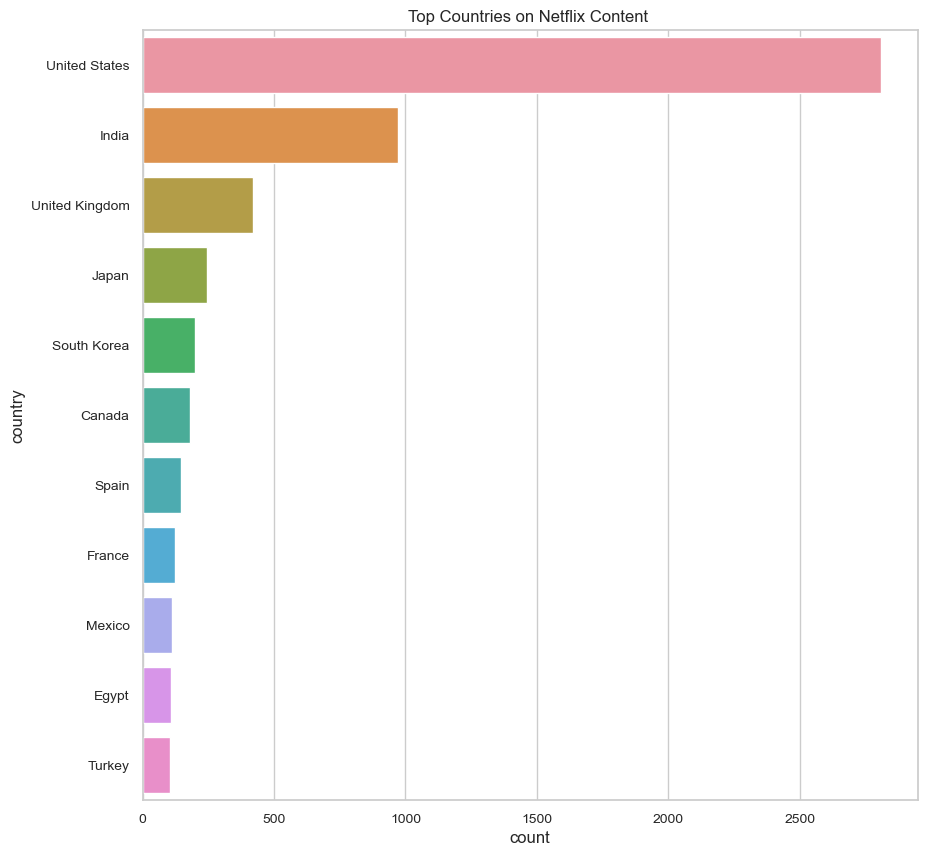

<Figure size 640x480 with 0 Axes>

In [126]:
# "Countries & Producing Content on Netflix exc.'Country_info_missing' ."

# Filter out 'Country_info_missing' category and selectcountries
top_countries = df_net[df_net['country'] != 'Country_info_missing']['country'].value_counts().head(11)

# Plot the count of content produced by each country
plt.figure(figsize=(10, 10))
y = sns.countplot(y='country', data=df_net[df_net['country'].isin(top_countries.index)], order=top_countries.index)

plt.tick_params(labelsize=10)
plt.title("Top Countries on Netflix Content ")
plt.show()
plt.savefig('Top Countries on Netflix Content.png')

2.2 Distribution of Content Types (Movies vs. TV Shows)


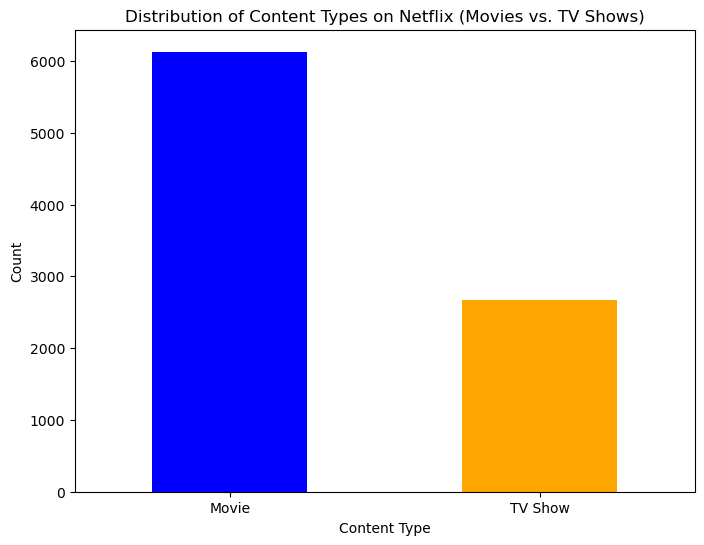

In [34]:
# Count the number of movies and TV shows
content_type_counts = df_net['type'].value_counts()

# Plot the distribution of content types
plt.figure(figsize=(8, 6))
content_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Content Types on Netflix (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [29]:
# Perform a cross-tabulation to analyze the distribution of content types across countries
content_type_distribution = pd.crosstab(index=df_subset['country'], columns=df_subset['type'])

# Display the cross-tabulation
print("Distribution of Content Types Across Countries:")
print(content_type_distribution)


Distribution of Content Types Across Countries:
type            Movie  TV Show
country                       
Turkey             76       29
United Kingdom    206      212
United States    2055      754


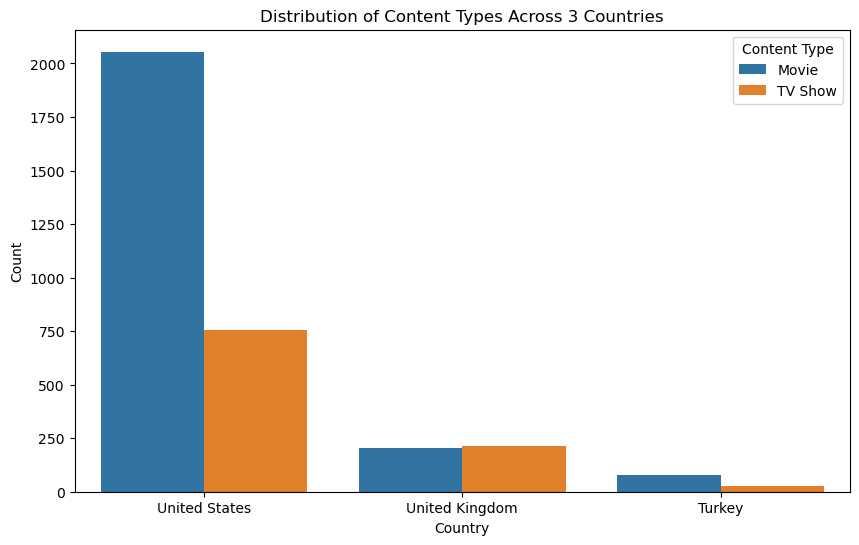

In [57]:
# Distribution of Content Types Across 3 Countries 

plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='country', hue='type')
plt.title('Distribution of Content Types Across 3 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()

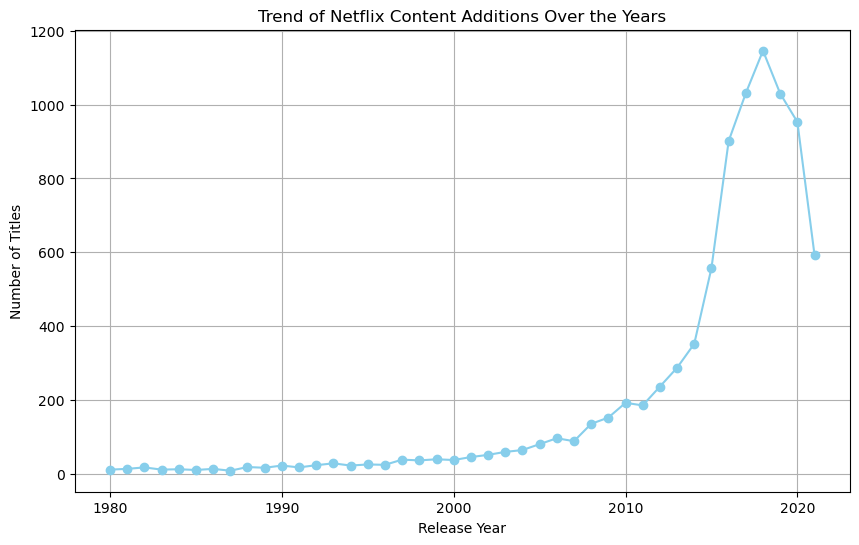

In [58]:
# 2.3 Trend of Netflix Content Additions Over the Years.

# Filter the data for release years starting from 1980
df_filtered = df_net[df_net['release_year'] >= 1980]

# Group the filtered data by release_year and count the number of titles added each year
content_counts = df_filtered.groupby('release_year').size()

# Visualize the trend using a line plot
plt.figure(figsize=(10, 6))
content_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of Netflix Content Additions Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

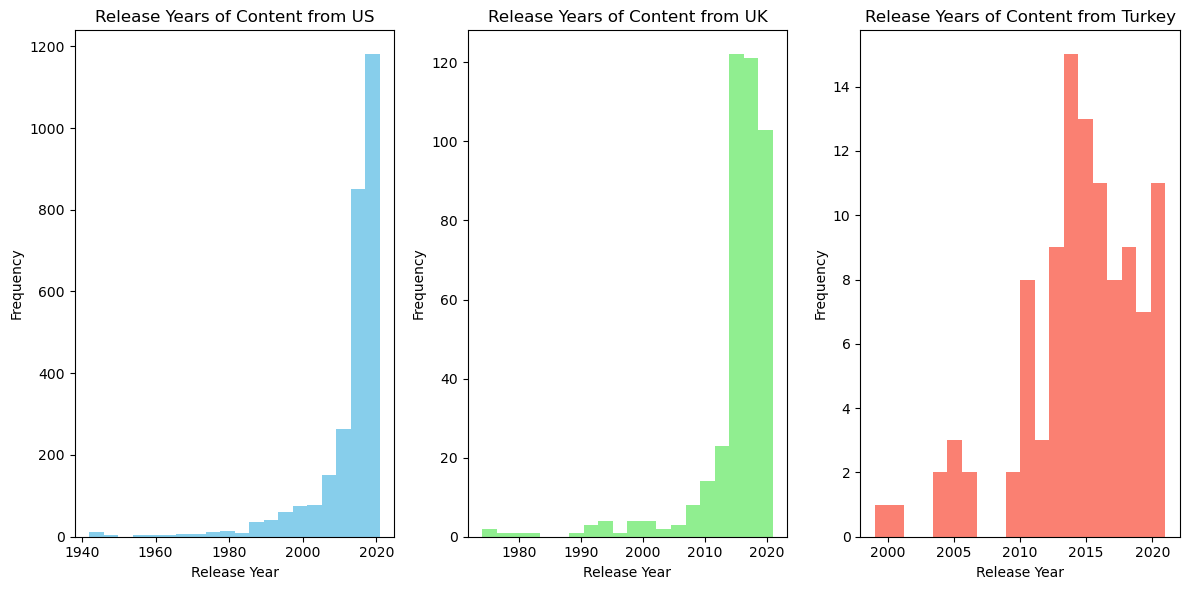

In [56]:
# Create separate histograms for release years of content from each country
plt.figure(figsize=(12, 6))

# United States
plt.subplot(1, 3, 1)
plt.hist(df_subset[df_subset['country'] == 'United States']['release_year'], bins=20, color='skyblue')
plt.title('Release Years of Content from US')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

# United Kingdom
plt.subplot(1, 3, 2)
plt.hist(df_subset[df_subset['country'] == 'United Kingdom']['release_year'], bins=20, color='lightgreen')
plt.title('Release Years of Content from UK')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

# Turkey
plt.subplot(1, 3, 3)
plt.hist(df_subset[df_subset['country'] == 'Turkey']['release_year'], bins=20, color='salmon')
plt.title('Release Years of Content from Turkey')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


2.4 Investigate the distribution of content ratings

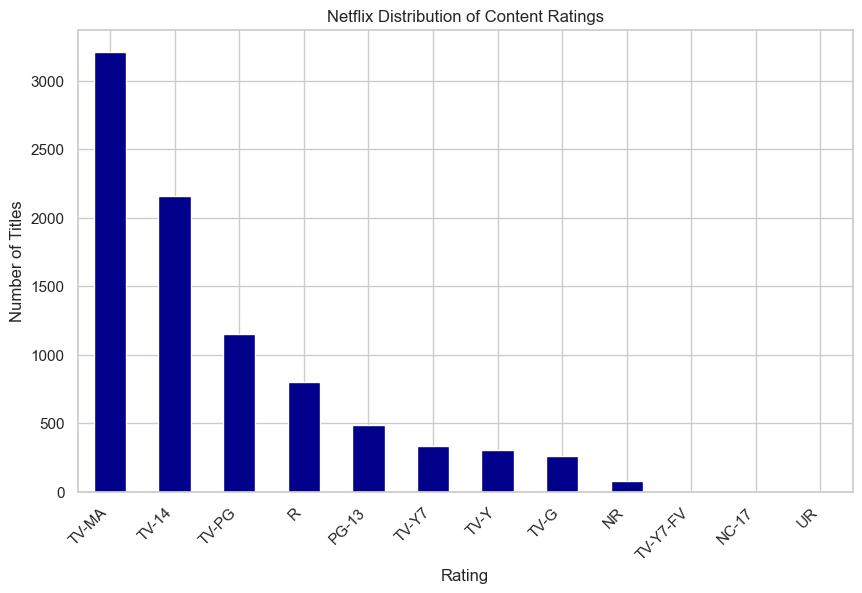

In [63]:
# Distribution of Content Ratings on Netflix : (Use value_counts())

# Count the number of titles for each rating category
rating_counts = df_net['rating'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='darkblue')
plt.title('Netflix Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

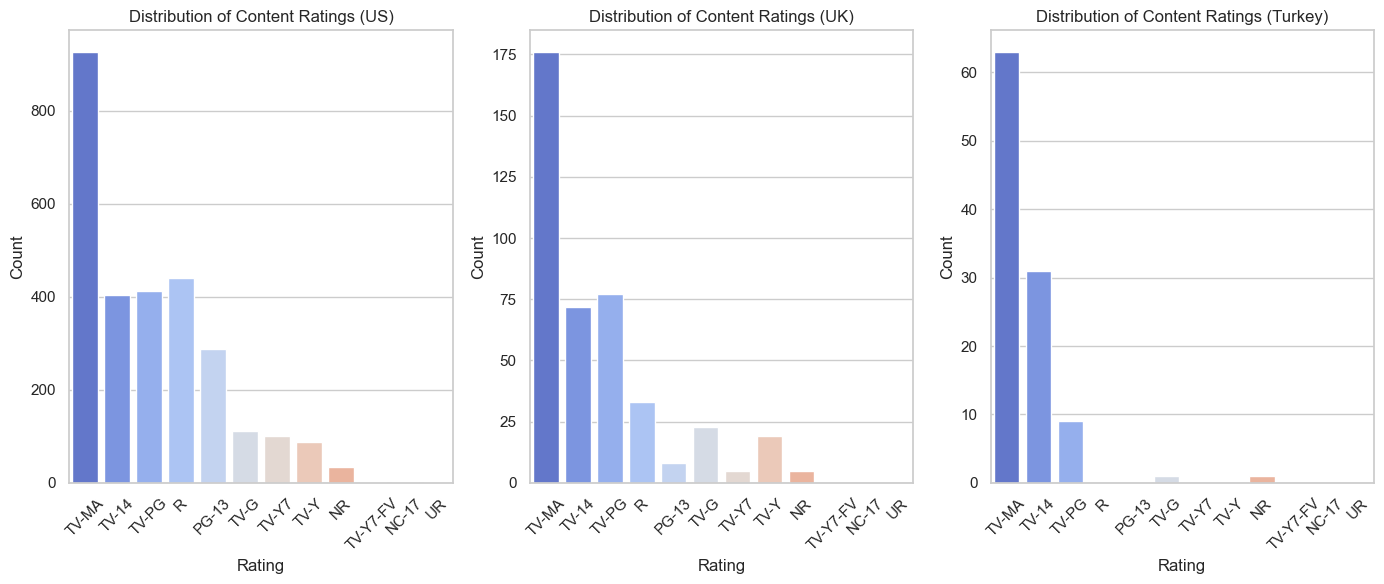

In [64]:
#Investigate the distribution of content ratings for each country.

# Set the style of seaborn
sns.set(style="whitegrid")

# Create count plots for content ratings of content from each country
plt.figure(figsize=(14, 6))

# United States
plt.subplot(1, 3, 1)
sns.countplot(data=df_subset[df_subset['country'] == 'United States'], x='rating', palette='coolwarm', order=df_subset['rating'].value_counts().index)
plt.title('Distribution of Content Ratings (US)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

# United Kingdom
plt.subplot(1, 3, 2)
sns.countplot(data=df_subset[df_subset['country'] == 'United Kingdom'], x='rating', palette='coolwarm', order=df_subset['rating'].value_counts().index)
plt.title('Distribution of Content Ratings (UK)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Turkey
plt.subplot(1, 3, 3)
sns.countplot(data=df_subset[df_subset['country'] == 'Turkey'], x='rating', palette='coolwarm', order=df_subset['rating'].value_counts().index)
plt.title('Distribution of Content Ratings (Turkey)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


2.5 Top Genres in Netflix Contents

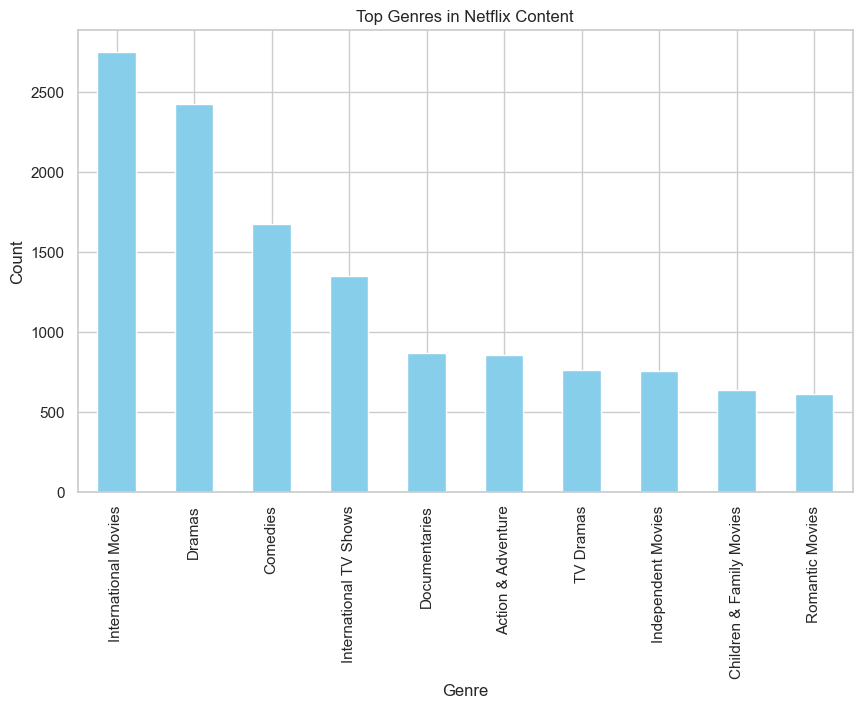

In [70]:

# Extract genres from the 'listed_in' column
genres = df_net['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top Genres in Netflix Contents')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

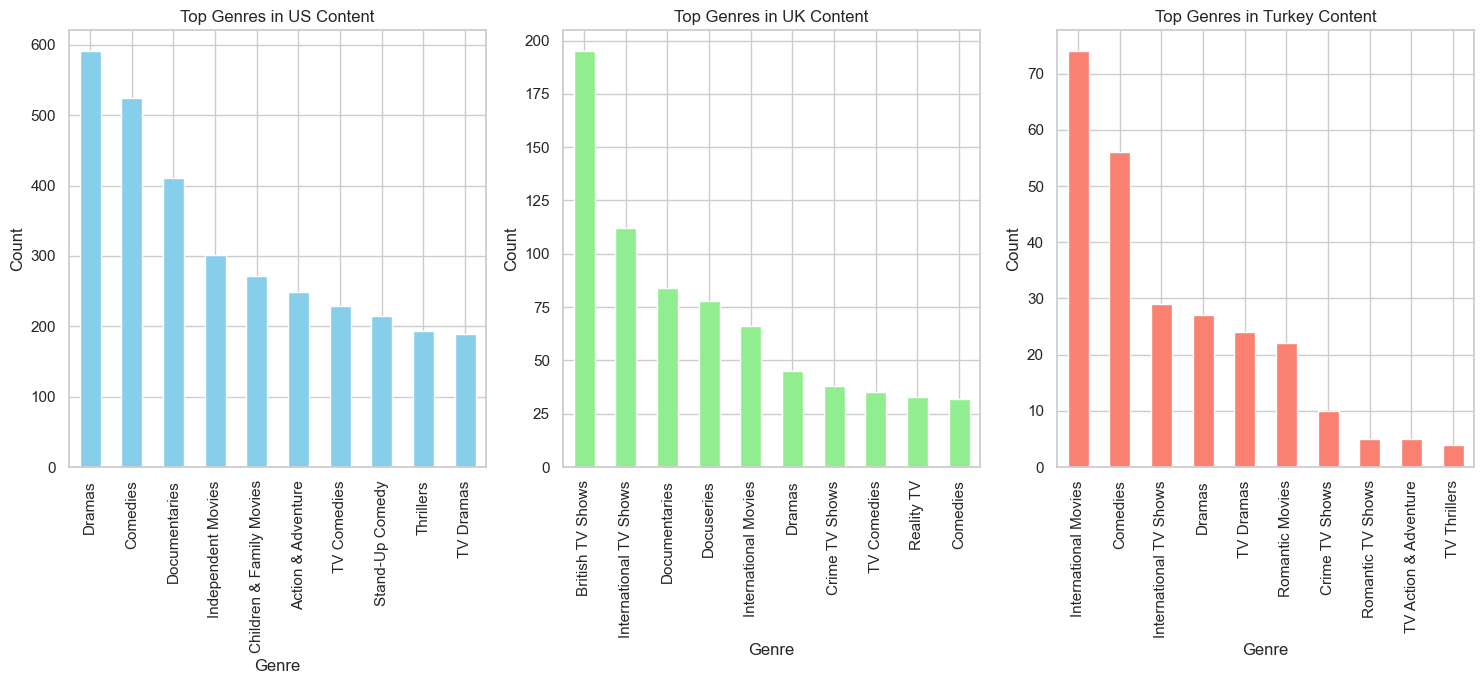

In [67]:
#Top Genres across the three countries : 

# Extract genres for each country
us_genres = df_subset[df_subset['country'] == 'United States']['listed_in'].str.split(', ').explode()
uk_genres = df_subset[df_subset['country'] == 'United Kingdom']['listed_in'].str.split(', ').explode()
turkey_genres = df_subset[df_subset['country'] == 'Turkey']['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre for each country
us_genre_counts = us_genres.value_counts().head(10)
uk_genre_counts = uk_genres.value_counts().head(10)
turkey_genre_counts = turkey_genres.value_counts().head(10)

# Plot the most common genres for each country
plt.figure(figsize=(15, 7))

# United States
plt.subplot(1, 3, 1)
us_genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top Genres in US Content')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

# United Kingdom
plt.subplot(1, 3, 2)
uk_genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Top Genres in UK Content')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Turkey
plt.subplot(1, 3, 3)
turkey_genre_counts.plot(kind='bar', color='salmon')
plt.title('Top Genres in Turkey Content')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


3.1 Counting the number of the movies for each country:

In [75]:
# Movies ONLY:

# Filter the DataFrame to include only rows where the 'type' column is 'Movie'
df_movie = df_net[df_net['type'] == 'Movie']

# Display the first few rows of df_movie
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast_info_missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country_info_missing,2021-09-24,2021,TV-PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [76]:
#Counting the number of the movies for each country

# Count the number of movies from US, UK, and Turkey
country_counts = df_movie['country'].value_counts()

# Extract the counts for US, UK, and Turkey (if available)
us_count = country_counts.get('United States', 0)
uk_count = country_counts.get('United Kingdom', 0)
turkey_count = country_counts.get('Turkey', 0)

# Print the counts
print("Number of movies from the United States:", us_count)
print("Number of movies from the United Kingdom:", uk_count)
print("Number of movies from Turkey:", turkey_count)

Number of movies from the United States: 2055
Number of movies from the United Kingdom: 206
Number of movies from Turkey: 76


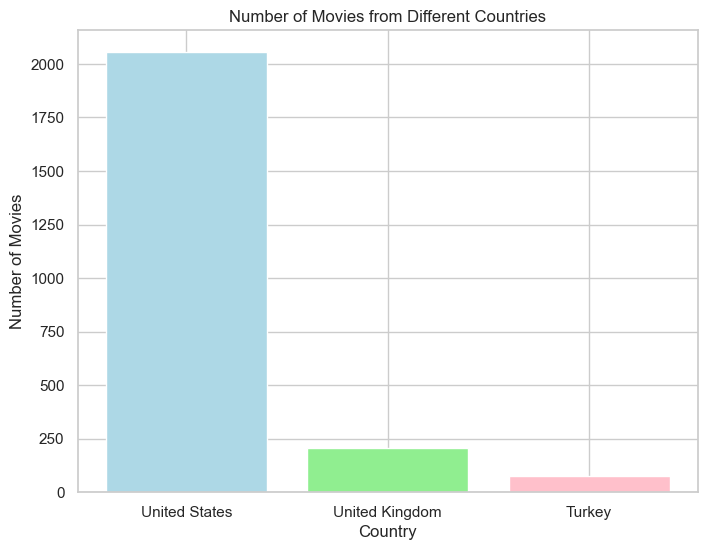

In [129]:

# Define light colors
light_blue = '#ADD8E6'
light_green = '#90EE90'
light_red = '#FFC0CB'

# Plotting the counts
plt.figure(figsize=(8, 6))
plt.bar(country_counts.keys(), country_counts.values(), color=[light_blue, light_green, light_red])
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Number of Movies from Different Countries')
plt.show()


In [77]:
# 3.2.Calculating average duration of movies in each country.

# Filter movies for each country
us_movies = df_movie[df_movie['country'] == 'United States']
uk_movies = df_movie[df_movie['country'] == 'United Kingdom']
turkey_movies = df_movie[df_movie['country'] == 'Turkey']

# Calculate average duration for each country
us_avg_duration = us_movies['duration'].str.extract('(\d+)').astype(float).mean()
uk_avg_duration = uk_movies['duration'].str.extract('(\d+)').astype(float).mean()
turkey_avg_duration = turkey_movies['duration'].str.extract('(\d+)').astype(float).mean()

# Print the average duration for each country
print("Average duration of movies from the United States:", us_avg_duration, "minutes")
print("Average duration of movies from the United Kingdom:", uk_avg_duration, "minutes")
print("Average duration of movies from Turkey:", turkey_avg_duration, "minutes")


Average duration of movies from the United States: 0    90.629684
dtype: float64 minutes
Average duration of movies from the United Kingdom: 0    84.868932
dtype: float64 minutes
Average duration of movies from Turkey: 0    107.421053
dtype: float64 minutes


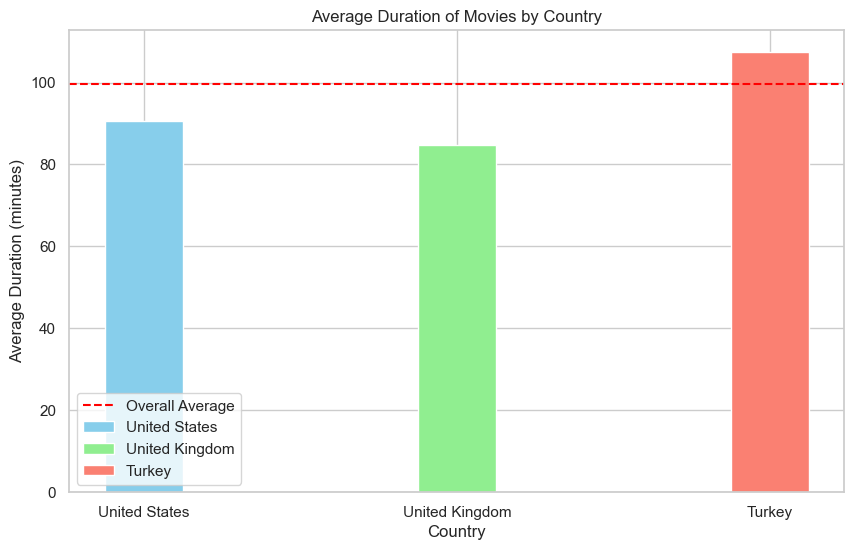

In [83]:

# Data
countries = ['United States', 'United Kingdom', 'Turkey']
avg_durations = [us_avg_duration, uk_avg_duration, turkey_avg_duration]
colors = ['skyblue', 'lightgreen', 'salmon']

# Calculate overall average duration for all movies
overall_avg_duration = df_movie['duration'].str.extract('(\d+)').astype(float).mean()

# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(countries))

# Plot each country's average duration separately
for i in range(len(countries)):
    plt.bar(index[i], avg_durations[i], bar_width, color=colors[i], label=countries[i])

# Plot overall average duration as a horizontal line
plt.axhline(y=overall_avg_duration.item(), color='red', linestyle='--', label='Overall Average')

plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration of Movies by Country')
plt.xticks(index, countries)
plt.legend()
plt.show()


In [84]:
# 3.3 Determine the most popular genres for TV shows and movies in each country. 

# Filter DataFrame for TV shows and movies separately
tv_shows_df = df_net[df_net['type'] == 'TV Show']
movies_df = df_net[df_net['type'] == 'Movie']

# Define a function to extract and count genres for each country
def count_genres_by_country(df, country):
    country_df = df[df['country'] == country]
    genres = country_df['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts().head(3)  # Get the top 3 most popular genres
    return genre_counts

# Determine the most popular genres for TV shows and movies in each country
countries = ['United States', 'United Kingdom', 'Turkey']

for country in countries:
    print(f"Most popular genres for TV shows in {country}:")
    tv_shows_genres = count_genres_by_country(tv_shows_df, country)
    print(tv_shows_genres)
    print()
    
    print(f"Most popular genres for movies in {country}:")
    movies_genres = count_genres_by_country(movies_df, country)
    print(movies_genres)
    print()


Most popular genres for TV shows in United States:
TV Comedies    229
TV Dramas      189
Docuseries     172
Name: listed_in, dtype: int64

Most popular genres for movies in United States:
Dramas           591
Comedies         524
Documentaries    411
Name: listed_in, dtype: int64

Most popular genres for TV shows in United Kingdom:
British TV Shows          195
International TV Shows    112
Docuseries                 78
Name: listed_in, dtype: int64

Most popular genres for movies in United Kingdom:
Documentaries           84
International Movies    66
Dramas                  45
Name: listed_in, dtype: int64

Most popular genres for TV shows in Turkey:
International TV Shows    29
TV Dramas                 24
Crime TV Shows            10
Name: listed_in, dtype: int64

Most popular genres for movies in Turkey:
International Movies    74
Comedies                56
Dramas                  27
Name: listed_in, dtype: int64



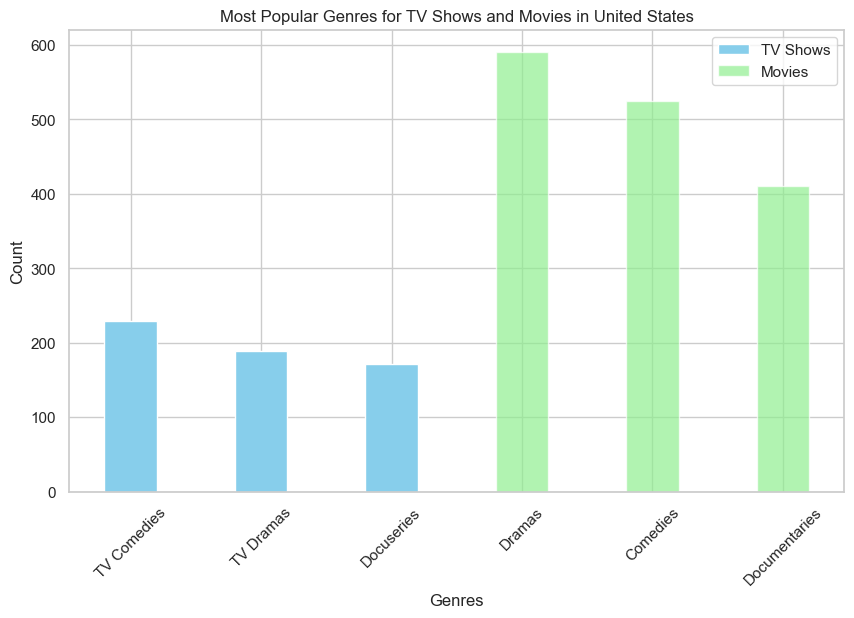

In [93]:
# Plot  'Most Popular Genres for TV Shows and Movies in United States'


# Filter DataFrame for TV shows and movies separately
tv_shows_us_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]
movies_us_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]

# Define a function to extract and count genres : :)
def count_genres(df):
    genres = df['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts().head(3)  # Get the top 3 most popular genres
    return genre_counts

# Calculate genre counts for TV shows and movies in the United States
tv_shows_genres_us = count_genres(tv_shows_us_df)
movies_genres_us = count_genres(movies_us_df)

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot genres for TV shows
ax.bar(tv_shows_genres_us.index, tv_shows_genres_us, width=0.4, label='TV Shows', color='skyblue')

# Plot genres for movies
ax.bar(movies_genres_us.index, movies_genres_us, width=0.4, label='Movies', color='lightgreen', alpha=0.7)

ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_title('Most Popular Genres for TV Shows and Movies in United States')
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


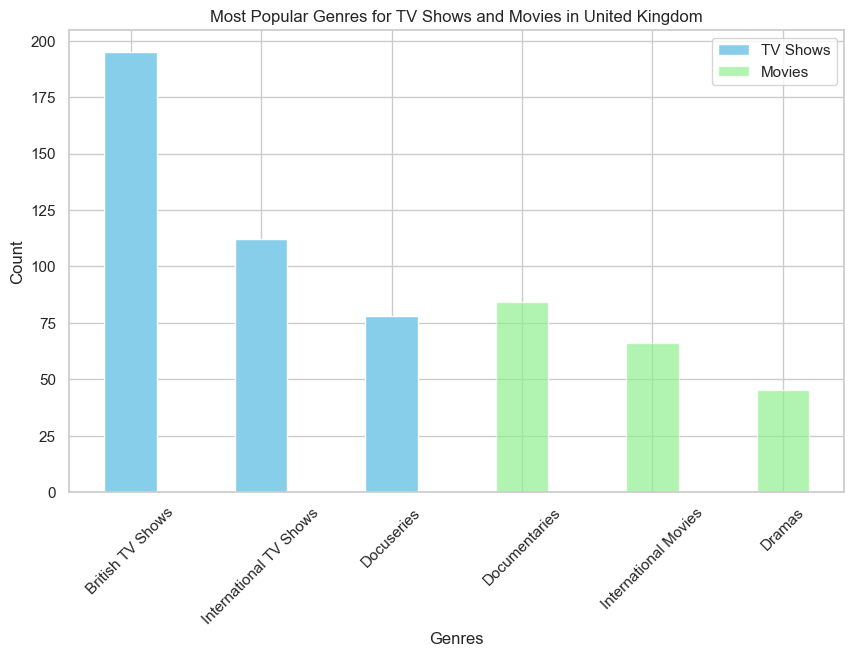

In [92]:
# Plot Most Popular Genres for TV Shows and Movies in United Kingdom

# Filter DataFrame for TV shows and movies separately
tv_shows_uk_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United Kingdom')]
movies_uk_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United Kingdom')]

# Define a function to extract and count genres:)
def count_genres(df):
    genres = df['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts().head(3)  # Get the top 3 most popular genres
    return genre_counts

# Calculate genre counts for TV shows and movies in the United Kingdom
tv_shows_genres_uk = count_genres(tv_shows_uk_df)
movies_genres_uk = count_genres(movies_uk_df)

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot genres for TV shows
ax.bar(tv_shows_genres_uk.index, tv_shows_genres_uk, width=0.4, label='TV Shows', color='skyblue')

# Plot genres for movies
ax.bar(movies_genres_uk.index, movies_genres_uk, width=0.4, label='Movies', color='lightgreen', alpha=0.7)

ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_title('Most Popular Genres for TV Shows and Movies in United Kingdom')
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


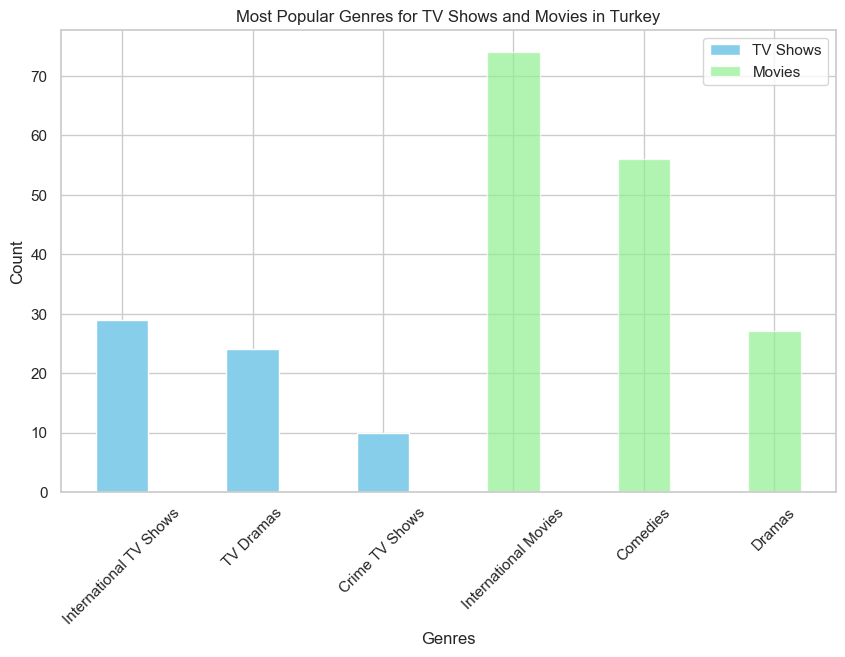

In [91]:
# Most Popular Genres for TV Shows and Movies in Turkey

# Filter DataFrame for TV shows and movies separately
tv_shows_turkey_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'Turkey')]
movies_turkey_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'Turkey')]

# Define a function to extract and count genres
def count_genres(df):
    genres = df['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts().head(3)  # Get the top 3 most popular genres
    return genre_counts

# Calculate genre counts for TV shows and movies in Turkey
tv_shows_genres_turkey = count_genres(tv_shows_turkey_df)
movies_genres_turkey = count_genres(movies_turkey_df)

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot genres for TV shows
ax.bar(tv_shows_genres_turkey.index, tv_shows_genres_turkey, width=0.4, label='TV Shows', color='skyblue')

# Plot genres for movies
ax.bar(movies_genres_turkey.index, movies_genres_turkey, width=0.4, label='Movies', color='lightgreen', alpha=0.7)

ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_title('Most Popular Genres for TV Shows and Movies in Turkey')
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


In [98]:
# Filter DataFrame for TV shows and movies separately for US
tv_shows_us_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]
movies_us_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]

# Filter DataFrame for TV shows and movies separately for UK
tv_shows_uk_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United Kingdom')]
movies_uk_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United Kingdom')]

# Filter DataFrame for TV shows and movies separately
tv_shows_turkey_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'Turkey')]
movies_turkey_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'Turkey')]




In [99]:
# 3.4 Investigate the most common directors for movies and TV shows in each country.
        #Data Quality issue here 'Director_info_missing'


# Define a function to extract and count directors
def count_directors(df):
    # Drop rows with missing director values
    df_cleaned = df.dropna(subset=['director'])
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Count occurrences of each director
    director_counts = directors.value_counts().head(3)  # Get the top 3 most common directors
    return director_counts

# Filter DataFrame for movies and TV shows separately for each country
countries = ['United States', 'United Kingdom', 'Turkey']
for country in countries:
    country_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == country)]
    country_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == country)]
    
    # Count directors for movies and TV shows in the country
    movies_directors = count_directors(country_movies_df)
    tv_shows_directors = count_directors(country_tv_shows_df)
    
    # Print the most common directors for movies and TV shows in the country
    print(f"\nMost common directors for movies in {country}:")
    print(movies_directors)
    print(f"\nMost common directors for TV shows in {country}:")
    print(tv_shows_directors)



Most common directors for movies in United States:
Director_info_missing    58
Jay Karas                15
Marcus Raboy             14
Name: director, dtype: int64

Most common directors for TV shows in United States:
Director_info_missing    706
Ken Burns                  3
Rob Seidenglanz            2
Name: director, dtype: int64

Most common directors for movies in United Kingdom:
Director_info_missing    15
Edward Cotterill          4
Nick Broomfield           2
Name: director, dtype: int64

Most common directors for TV shows in United Kingdom:
Director_info_missing    191
Alastair Fothergill        2
Andy Devonshire            1
Name: director, dtype: int64

Most common directors for movies in Turkey:
Yılmaz Erdoğan    9
Hakan Algül       8
Ozan Açıktan      6
Name: director, dtype: int64

Most common directors for TV shows in Turkey:
Director_info_missing    24
Ahmet Katıksız            1
Seren Yüce                1
Name: director, dtype: int64


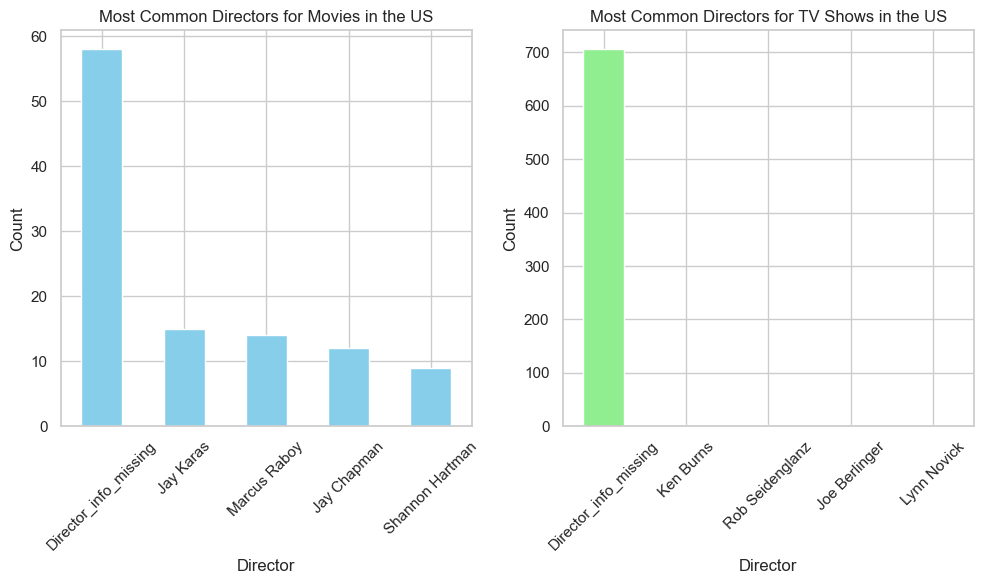

In [100]:


# Filter DataFrame for movies and TV shows separately for the United States
us_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]
us_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]

# Define a function to extract and count directors
def count_directors(df):
    # Drop rows with missing director values
    df_cleaned = df.dropna(subset=['director'])
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Count occurrences of each director
    director_counts = directors.value_counts().head(5)  # Get the top 5 most common directors
    return director_counts

# Count directors for movies and TV shows in the United States
movies_directors = count_directors(us_movies_df)
tv_shows_directors = count_directors(us_tv_shows_df)

# Create a bar plot for the most common directors for movies and TV shows in the United States
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
movies_directors.plot(kind='bar', color='skyblue')
plt.title('Most Common Directors for Movies in the US')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
tv_shows_directors.plot(kind='bar', color='lightgreen')
plt.title('Most Common Directors for TV Shows in the US')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


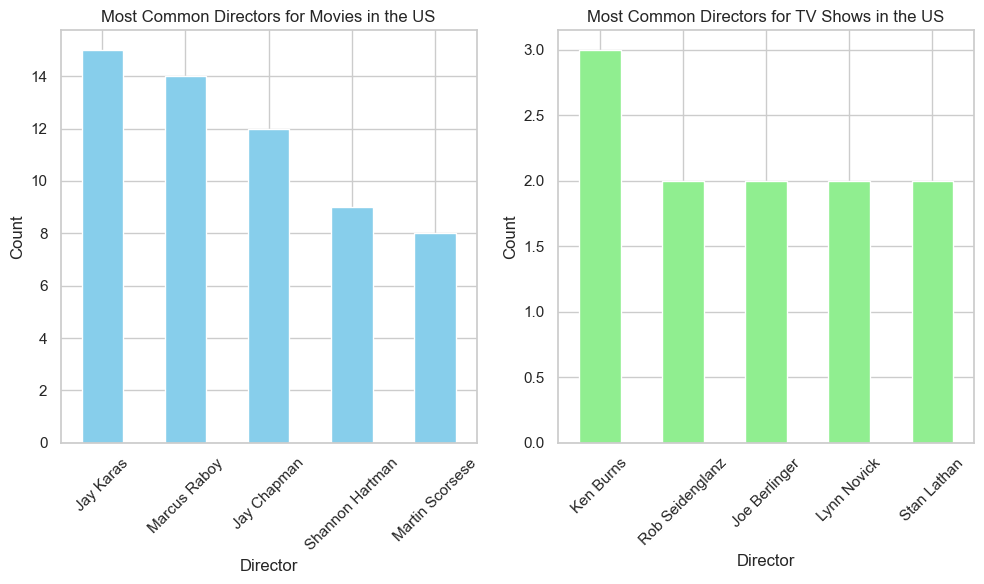

In [101]:
# Most Common Directors for TV Shows & Movies in the US

# Filter DataFrame for movies and TV shows separately for the United States
us_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]
us_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]

# Define a function to extract and count directors
def count_directors(df):
    # Drop rows with missing director values
    df_cleaned = df.dropna(subset=['director'])
    # Exclude "Director_info_missing" from the counts
    df_cleaned = df_cleaned[df_cleaned['director'] != 'Director_info_missing']
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Count occurrences of each director
    director_counts = directors.value_counts().head(5)  # Get the top 5 most common directors
    return director_counts

# Count directors for movies and TV shows in the United States
movies_directors = count_directors(us_movies_df)
tv_shows_directors = count_directors(us_tv_shows_df)

# Create a bar plot for the most common directors for movies and TV shows in the United States
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
movies_directors.plot(kind='bar', color='skyblue')
plt.title('Most Common Directors for Movies in the US')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
tv_shows_directors.plot(kind='bar', color='lightgreen')
plt.title('Most Common Directors for TV Shows in the US')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


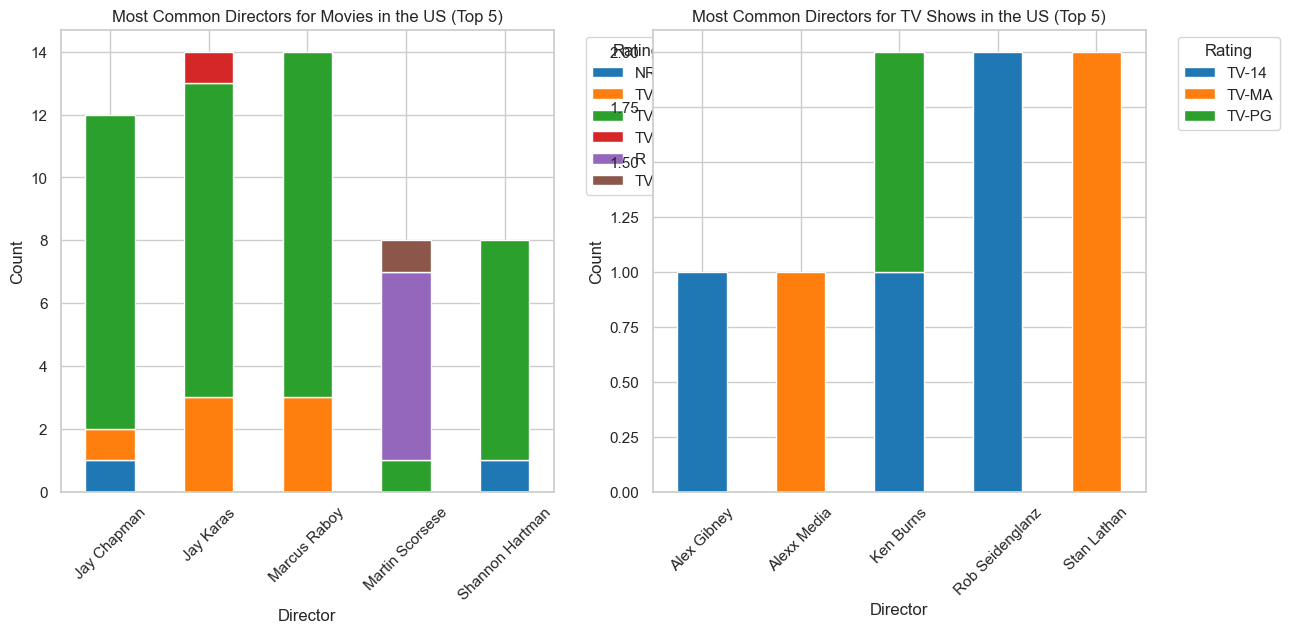

In [116]:

# Filter DataFrame for movies and TV shows separately for the United States
us_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]
us_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]

# Define a function to extract and count directors with ratings
def count_directors_with_ratings(df):
    # Drop rows with missing director values
    df_cleaned = df.dropna(subset=['director', 'rating'])
    # Exclude "Director_info_missing" from the counts
    df_cleaned = df_cleaned[df_cleaned['director'] != 'Director_info_missing']
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Group by director and rating, then count occurrences
    director_rating_counts = df_cleaned.groupby(['director', 'rating']).size()
    return director_rating_counts

# Count directors with ratings for movies and TV shows in the United States
movies_directors_with_ratings = count_directors_with_ratings(us_movies_df)
tv_shows_directors_with_ratings = count_directors_with_ratings(us_tv_shows_df)

# Get top 5 directors for movies and TV shows
top_5_movies_directors = movies_directors_with_ratings.groupby('director').sum().nlargest(5).index
top_5_tv_shows_directors = tv_shows_directors_with_ratings.groupby('director').sum().nlargest(5).index

# Filter data for top 5 directors
top_5_movies_directors_with_ratings = movies_directors_with_ratings[movies_directors_with_ratings.index.get_level_values('director').isin(top_5_movies_directors)]
top_5_tv_shows_directors_with_ratings = tv_shows_directors_with_ratings[tv_shows_directors_with_ratings.index.get_level_values('director').isin(top_5_tv_shows_directors)]

# Create a figure with adjusted size
plt.figure(figsize=(14, 6))

# Plot for movies
plt.subplot(1, 2, 1)
top_5_movies_directors_with_ratings.unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Most Common Directors for Movies in the US (Top 5)')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot for TV shows
plt.subplot(1, 2, 2)
top_5_tv_shows_directors_with_ratings.unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Most Common Directors for TV Shows in the US (Top 5)')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


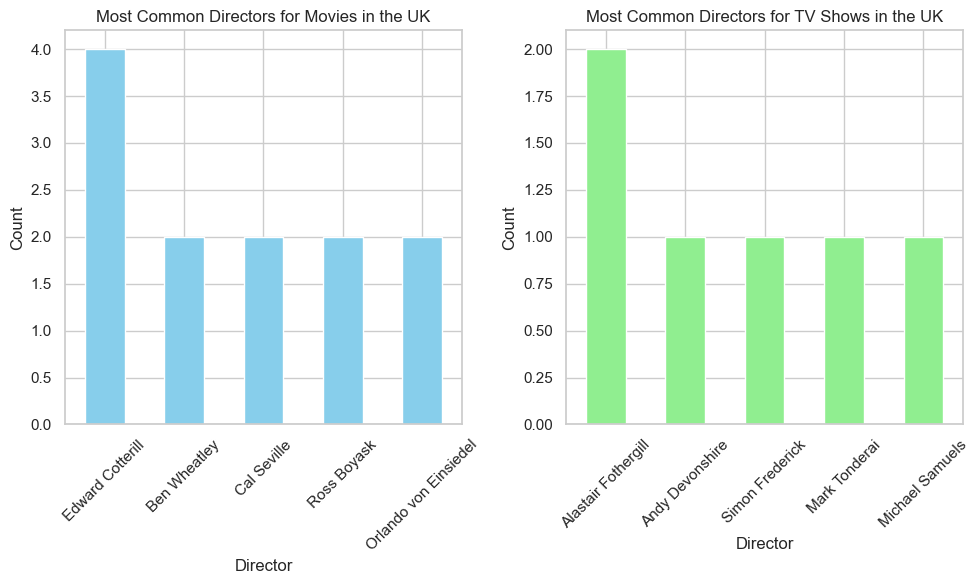

In [104]:
# Most Common Directors for TV Shows & Movies in UK 

# Filter DataFrame for movies and TV shows separately for the United Kingdom
uk_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United Kingdom')]
uk_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United Kingdom')]

# Define a function to extract and count directors (excluding "Director_info_missing")
def count_directors(df):
    # Drop rows with missing director values and "Director_info_missing"
    df_cleaned = df.dropna(subset=['director'])
    df_cleaned = df_cleaned[df_cleaned['director'] != 'Director_info_missing']
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Count occurrences of each director
    director_counts = directors.value_counts().head(5)  # Get the top 5 most common directors
    return director_counts

# Count directors for movies and TV shows in the United Kingdom (excluding "Director_info_missing")
uk_movies_directors = count_directors(uk_movies_df)
uk_tv_shows_directors = count_directors(uk_tv_shows_df)

# Create a bar plot for the most common directors for movies and TV shows in the United Kingdom
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
uk_movies_directors.plot(kind='bar', color='skyblue')
plt.title('Most Common Directors for Movies in the UK')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
uk_tv_shows_directors.plot(kind='bar', color='lightgreen')
plt.title('Most Common Directors for TV Shows in the UK')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

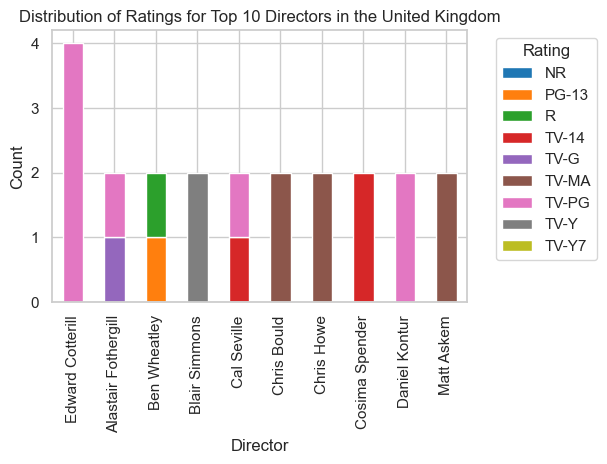

In [121]:
# Filter DataFrame for directors in the United Kingdom
uk_directors = df_net[df_net['country'] == 'United Kingdom']

# Filter out rows with director's name as "Director_info_missing"
uk_directors = uk_directors[uk_directors['director'] != 'Director_info_missing']

# Group the data by 'director' and 'rating', then count the occurrences
uk_director_rating_counts = uk_directors.groupby(['director', 'rating']).size().unstack(fill_value=0)

# Get the top 10 directors based on the count of titles
top_10_uk_directors = uk_director_rating_counts.sum(axis=1).nlargest(10)

# Select only the rows corresponding to the top 10 directors
top_10_uk_director_rating_counts = uk_director_rating_counts.loc[top_10_uk_directors.index]

# Use seaborn color palette for better visualization
sns.set_palette("tab10")

# Plotting
plt.figure(figsize=(12, 8))
top_10_uk_director_rating_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Ratings for Top 10 Directors in the United Kingdom')
plt.xlabel('Director')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

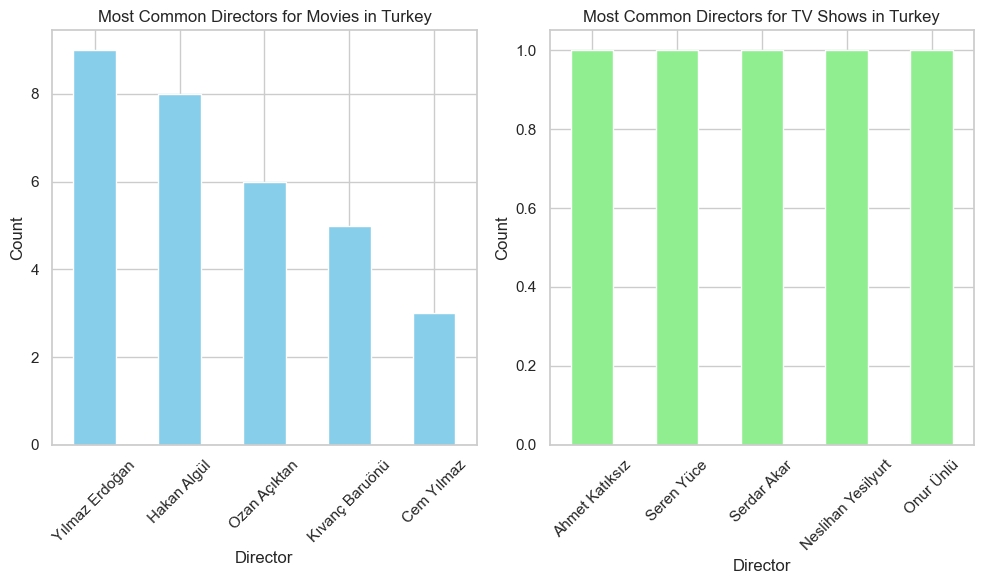

In [105]:
# Most Common Directors for TV Shows & Movies in Turkey

# Filter DataFrame for movies and TV shows separately for Turkey
turkey_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'Turkey')]
turkey_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'Turkey')]

# Define a function to extract and count directors (excluding "Director_info_missing")
def count_directors(df):
    # Drop rows with missing director values and "Director_info_missing"
    df_cleaned = df.dropna(subset=['director'])
    df_cleaned = df_cleaned[df_cleaned['director'] != 'Director_info_missing']
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Count occurrences of each director
    director_counts = directors.value_counts().head(5)  # Get the top 5 most common directors
    return director_counts

# Count directors for movies and TV shows in Turkey (excluding "Director_info_missing")
turkey_movies_directors = count_directors(turkey_movies_df)
turkey_tv_shows_directors = count_directors(turkey_tv_shows_df)

# Create a bar plot for the most common directors for movies and TV shows in Turkey
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
turkey_movies_directors.plot(kind='bar', color='skyblue')
plt.title('Most Common Directors for Movies in Turkey')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
turkey_tv_shows_directors.plot(kind='bar', color='lightgreen')
plt.title('Most Common Directors for TV Shows in Turkey')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

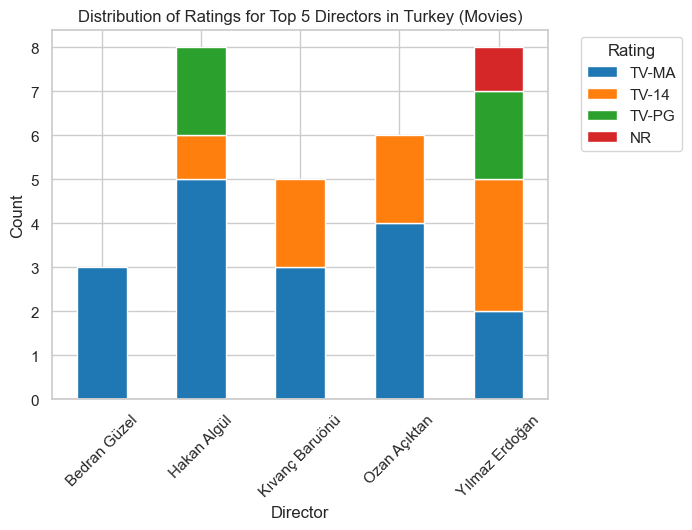

In [122]:


# Filter DataFrame for movies in Turkey
turkey_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'Turkey')]

# Define a function to count directors with ratings
def count_directors_with_ratings(df):
    # Drop rows with missing director values
    df_cleaned = df.dropna(subset=['director', 'rating'])
    # Exclude "Director_info_missing" from the counts
    df_cleaned = df_cleaned[df_cleaned['director'] != 'Director_info_missing']
    # Split multiple directors if present and explode into separate rows
    directors = df_cleaned['director'].str.split(', ').explode()
    # Group by director and rating, then count occurrences
    director_rating_counts = df_cleaned.groupby(['director', 'rating']).size()
    return director_rating_counts

# Count directors with ratings for movies in Turkey
movies_directors_with_ratings_turkey = count_directors_with_ratings(turkey_movies_df)

# Get top 5 directors for movies in Turkey
top_5_movies_directors_turkey = movies_directors_with_ratings_turkey.groupby('director').sum().nlargest(5).index

# Filter data for top 5 directors
top_5_movies_directors_with_ratings_turkey = movies_directors_with_ratings_turkey[movies_directors_with_ratings_turkey.index.get_level_values('director').isin(top_5_movies_directors_turkey)]

# Create a bar plot for the distribution of ratings for top 5 directors in Turkey (Movies)
plt.figure(figsize=(10, 6))
top_5_movies_directors_with_ratings_turkey.unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Ratings for Top 5 Directors in Turkey (Movies)')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

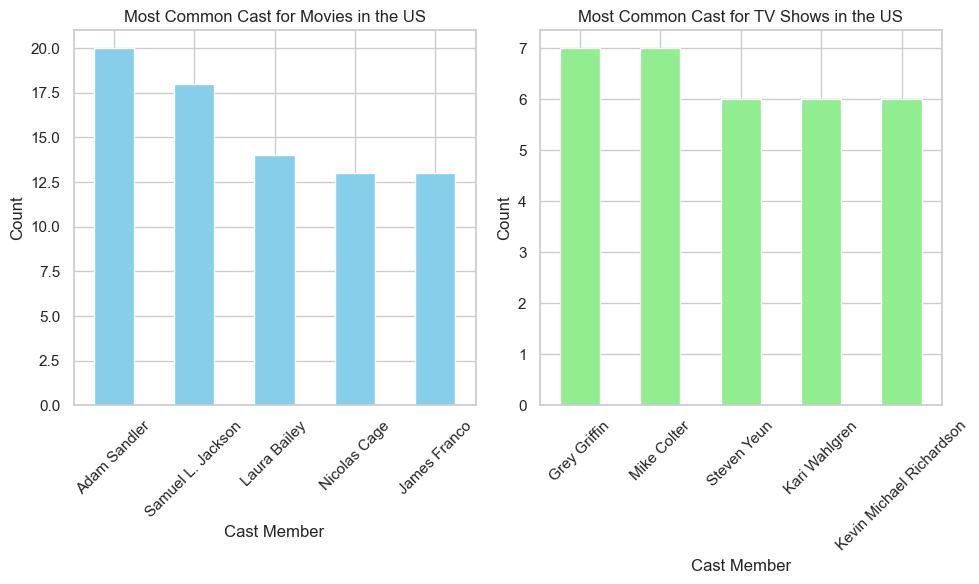

In [107]:
#3.6 Investigate the most common cast for movies and TV shows in each country.






# Filter DataFrame for movies and TV shows separately for the United States
us_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United States')]
us_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United States')]

# Define a function to extract and count cast members (excluding "Cast_info_missing")
def count_cast(df):
    # Drop rows with missing cast values and "Cast_info_missing"
    df_cleaned = df.dropna(subset=['cast'])
    df_cleaned = df_cleaned[df_cleaned['cast'] != 'Cast_info_missing']
    # Split multiple cast members if present and explode into separate rows
    cast = df_cleaned['cast'].str.split(', ').explode()
    # Count occurrences of each cast member
    cast_counts = cast.value_counts().head(5)  # Get the top 5 most common cast members
    return cast_counts

# Count cast members for movies and TV shows in the United States (excluding "Cast_info_missing")
us_movies_cast = count_cast(us_movies_df)
us_tv_shows_cast = count_cast(us_tv_shows_df)

# Create a bar plot for the most common cast members for movies and TV shows in the United States
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
us_movies_cast.plot(kind='bar', color='skyblue')
plt.title('Most Common Cast for Movies in the US')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
us_tv_shows_cast.plot(kind='bar', color='lightgreen')
plt.title('Most Common Cast for TV Shows in the US')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


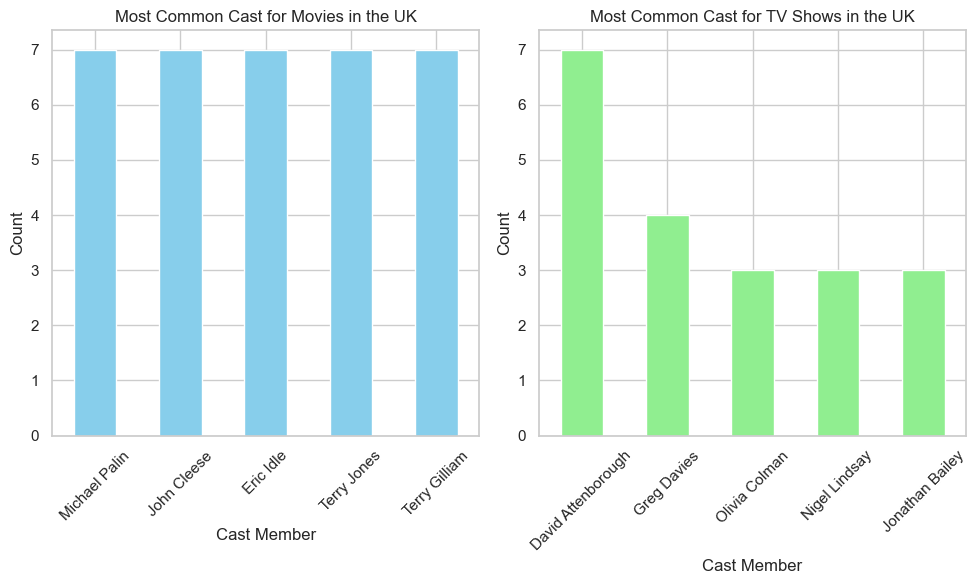

In [108]:

# Filter DataFrame for movies and TV shows separately for the United Kingdom
uk_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'United Kingdom')]
uk_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'United Kingdom')]

# Define a function to extract and count cast members (excluding "Cast_info_missing")
def count_cast(df):
    # Drop rows with missing cast values and "Cast_info_missing"
    df_cleaned = df.dropna(subset=['cast'])
    df_cleaned = df_cleaned[df_cleaned['cast'] != 'Cast_info_missing']
    # Split multiple cast members if present and explode into separate rows
    cast = df_cleaned['cast'].str.split(', ').explode()
    # Count occurrences of each cast member
    cast_counts = cast.value_counts().head(5)  # Get the top 5 most common cast members
    return cast_counts

# Count cast members for movies and TV shows in the United Kingdom (excluding "Cast_info_missing")
uk_movies_cast = count_cast(uk_movies_df)
uk_tv_shows_cast = count_cast(uk_tv_shows_df)

# Create a bar plot for the most common cast members for movies and TV shows in the United Kingdom
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
uk_movies_cast.plot(kind='bar', color='skyblue')
plt.title('Most Common Cast for Movies in the UK')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
uk_tv_shows_cast.plot(kind='bar', color='lightgreen')
plt.title('Most Common Cast for TV Shows in the UK')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


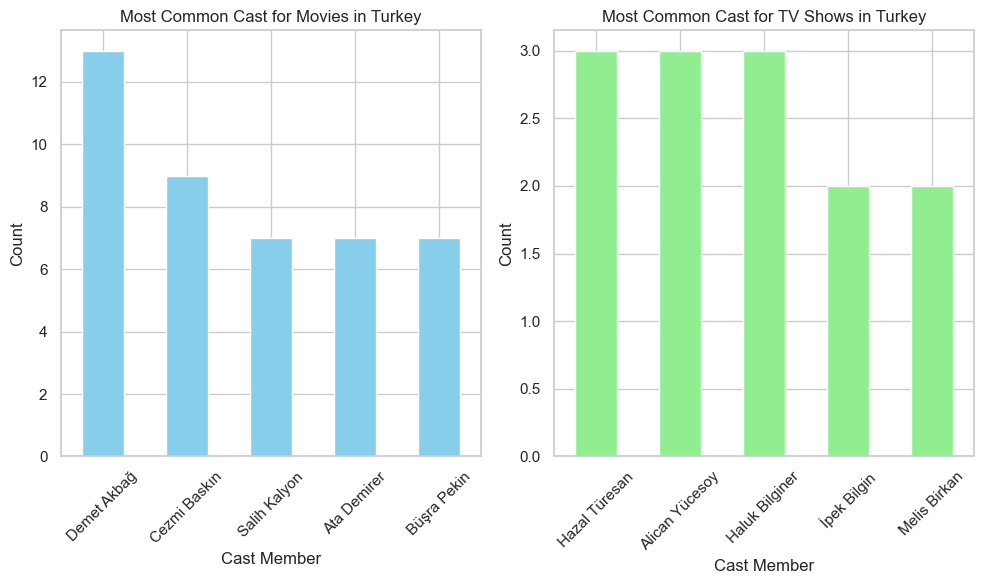

In [109]:

# Filter DataFrame for movies and TV shows separately for Turkey
turkey_movies_df = df_net[(df_net['type'] == 'Movie') & (df_net['country'] == 'Turkey')]
turkey_tv_shows_df = df_net[(df_net['type'] == 'TV Show') & (df_net['country'] == 'Turkey')]

# Define a function to extract and count cast members (excluding "Cast_info_missing")
def count_cast(df):
    # Drop rows with missing cast values and "Cast_info_missing"
    df_cleaned = df.dropna(subset=['cast'])
    df_cleaned = df_cleaned[df_cleaned['cast'] != 'Cast_info_missing']
    # Split multiple cast members if present and explode into separate rows
    cast = df_cleaned['cast'].str.split(', ').explode()
    # Count occurrences of each cast member
    cast_counts = cast.value_counts().head(5)  # Get the top 5 most common cast members
    return cast_counts

# Count cast members for movies and TV shows in Turkey (excluding "Cast_info_missing")
turkey_movies_cast = count_cast(turkey_movies_df)
turkey_tv_shows_cast = count_cast(turkey_tv_shows_df)

# Create a bar plot for the most common cast members for movies and TV shows in Turkey
plt.figure(figsize=(10, 6))

# Plot for movies
plt.subplot(1, 2, 1)
turkey_movies_cast.plot(kind='bar', color='skyblue')
plt.title('Most Common Cast for Movies in Turkey')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for TV shows
plt.subplot(1, 2, 2)
turkey_tv_shows_cast.plot(kind='bar', color='lightgreen')
plt.title('Most Common Cast for TV Shows in Turkey')
plt.xlabel('Cast Member')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


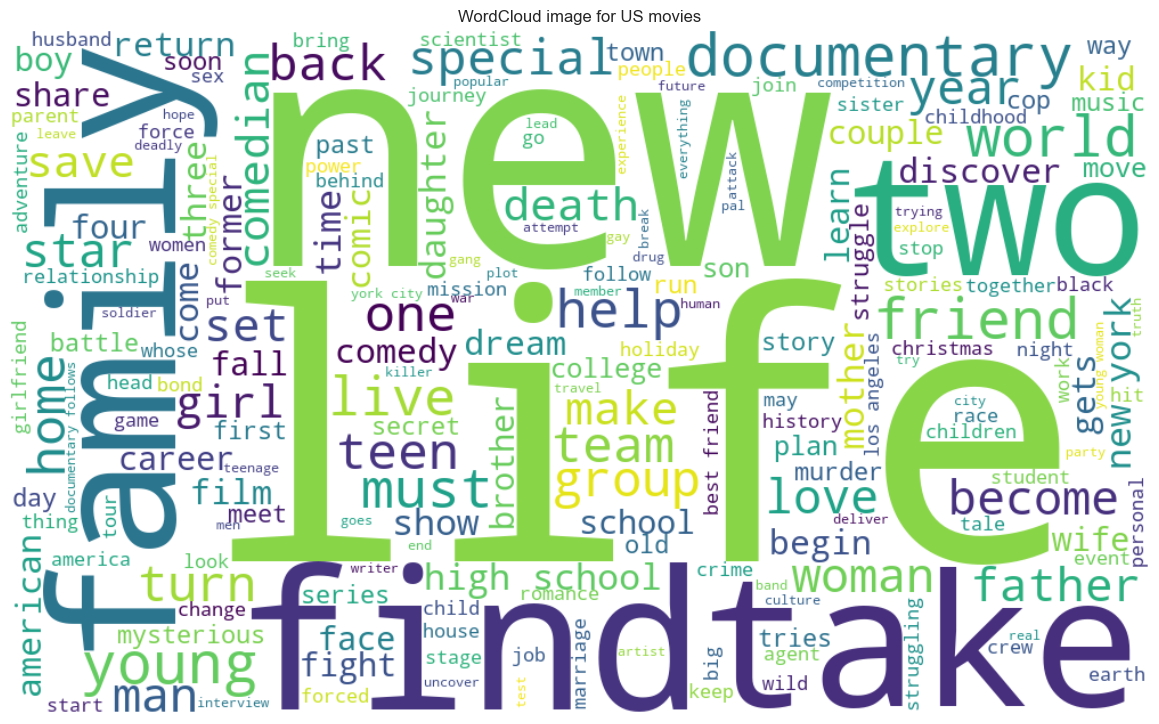

In [132]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Filter movies for US, UK, and Turkey
us_movies = df_movie[df_movie['country'] == 'United States']
uk_movies = df_movie[df_movie['country'] == 'United Kingdom']
turkey_movies = df_movie[df_movie['country'] == 'Turkey']

# Concatenate descriptions of movies from each country into a single string
us_descriptions = us_movies['description'].str.cat(sep=' ')
uk_descriptions = uk_movies['description'].str.cat(sep=' ')
turkey_descriptions = turkey_movies['description'].str.cat(sep=' ')

# Remove stop words
stop_words = set(stopwords.words('english'))  # assuming English stop words
us_words = [word for word in word_tokenize(us_descriptions.lower()) if word.isalnum() and word not in stop_words]
uk_words = [word for word in word_tokenize(uk_descriptions.lower()) if word.isalnum() and word not in stop_words]
turkey_words = [word for word in word_tokenize(turkey_descriptions.lower()) if word.isalnum() and word not in stop_words]

# Concatenate words from all countries
all_us_descriptions = ' '.join(us_words)
all_uk_descriptions = ' '.join(uk_words)
all_turkey_descriptions = ' '.join(turkey_words)

# Generate WordCloud images for each country
us_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_us_descriptions)
uk_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_uk_descriptions)
turkey_wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_turkey_descriptions)

# Display the WordCloud images
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))

plt.subplot(1, 3, 1)
plt.imshow(us_wordcloud, interpolation='bilinear')
plt.title('WordCloud image for US movies')
plt.axis('off')



plt.show()


(-0.5, 999.5, 599.5, -0.5)

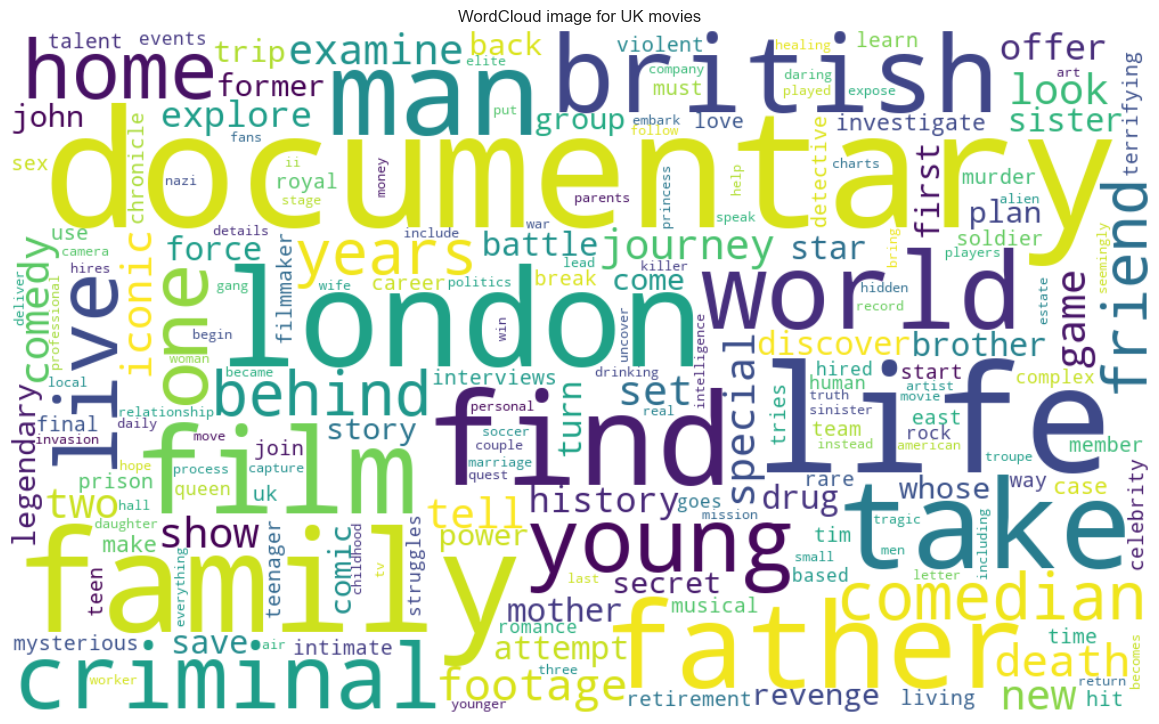

In [134]:
plt.figure(figsize=(50, 10))
plt.subplot(1, 3, 2)
plt.imshow(uk_wordcloud, interpolation='bilinear')
plt.title('WordCloud image for UK movies')
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

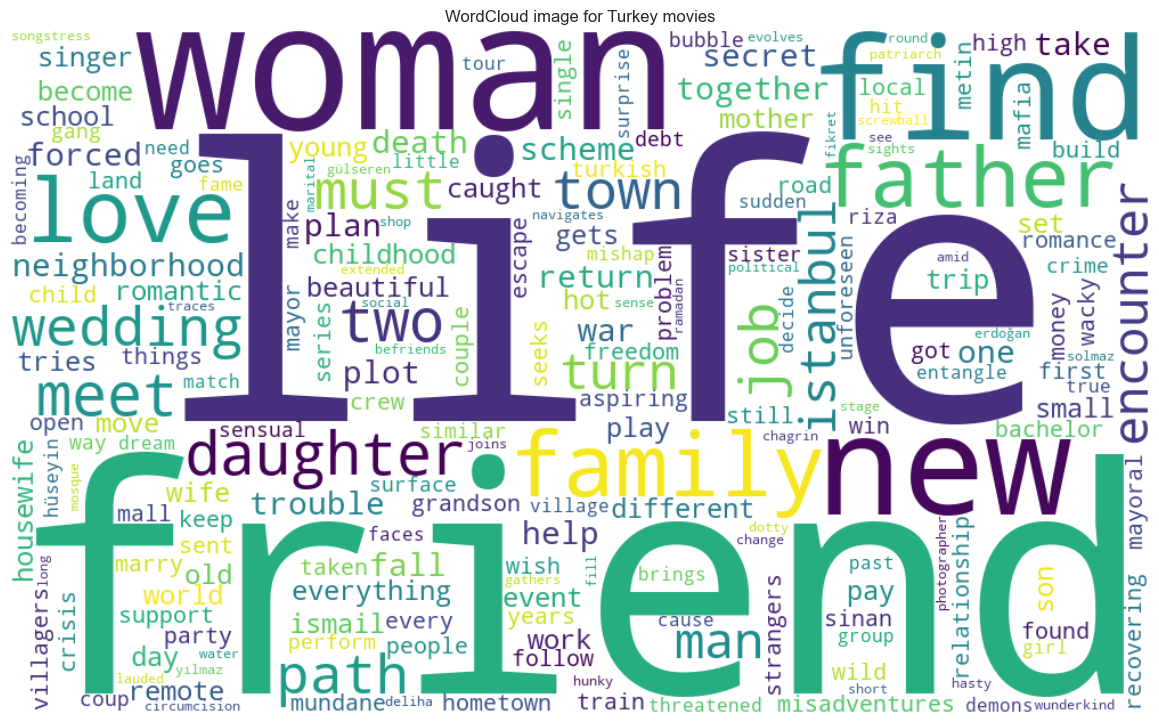

In [135]:
plt.figure(figsize=(50, 10))
plt.subplot(1, 3, 3)
plt.imshow(turkey_wordcloud, interpolation='bilinear')
plt.title('WordCloud image for Turkey movies')
plt.axis('off')